In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os

# Change working directory to root path
os.chdir("..") 

In [3]:
from motion_code import MotionCode
import numpy as np
from utils import plot_timeseries, plot_motion_codes
from data_processing import get_pronunciation_audio_data_unequal_lengths

In [4]:
# Get pronunciation audio data
X_train, Y_train, labels_train, X_test, Y_test, labels_test = get_pronunciation_audio_data_unequal_lengths()
label_names = ['absorptivity', 'anything']

In [5]:
print([s.shape[0] for s in X_train])

[80, 81, 84, 81, 90, 80, 93, 90, 91, 94, 81, 94, 91, 82, 89, 94]


In [6]:
# Build motion code
model = MotionCode(m=10, Q=1, latent_dim=2, sigma_y=0.1)

# Train model on unequal length Sound data
model_path = 'saved_models/' + 'test_audio'
model.fit(X_train, Y_train, labels_train, model_path)

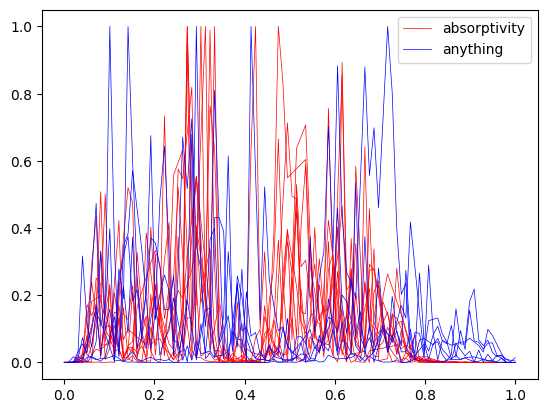

<Figure size 640x480 with 0 Axes>

In [7]:
plot_timeseries(X_train, Y_train, labels_train, label_names=label_names,
                        output_file='out/plot_train_test_audio.png')

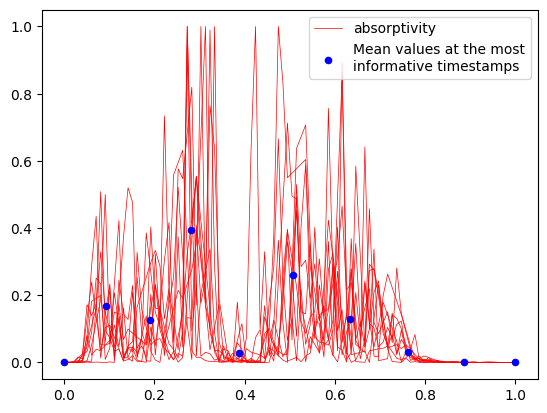

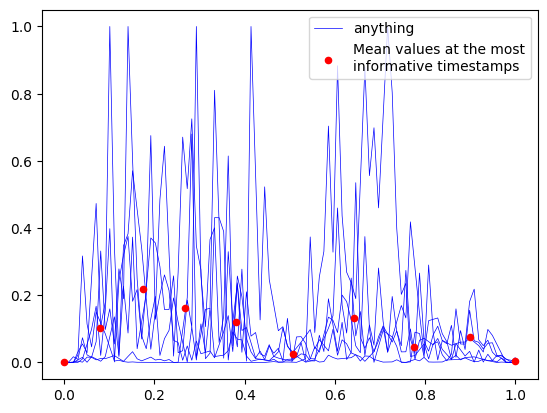

<Figure size 640x480 with 0 Axes>

In [8]:
model.load(model_path)
plot_motion_codes(X_train, Y_train, None, labels_train, label_names,
                    model, output_dir='out/multiple/test_audio',
                    additional_data={'X': np.array(X_test), 'Y': np.array(Y_test)})